## Sprint 1 - Data Exploration and Basic EDA

This notebook is the first notebook. It outlines processes to familiarize LinkedIn Job Postings dataset from 2023. Here, we will go over the data quality issues through various data cleaning methods and highlight any other notable observations regarding data processing. Then, the basic Exploratory Data Analysis (EDA) has been performed to showcase potential relationships between different variables and `views`, our target variable. 

Author: JJ Park

Date: 28/02/2024

## LinkedIn Job Postings 2023

### Dataset

Dataset has been sourced from: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings/data. 

### Table of Contents

1. Data Dictionary
2. Data Loading
3. Data Cleaning - Datatypes
4. Data Cleaning - Duplicates
5. Data Cleaning - Null Values
6. Basic EDA
7. Summary

### Data Dictionary

The data dictionary outlines all the variables from the `job_postings.csv` dataset. The descriptions of each variable are directly sourced from the author's Github: https://github.com/ArshKA/LinkedIn-Job-Scraper/blob/master/DatabaseStructure.md.

1. `job_id`: The job ID as defined by LinkedIn (https://www.linkedin.com/jobs/view/{ job_id })
2. `company_id`: Identifier for the company associated with the job posting (maps to companies.csv)
3. `title`: Job title
4. `description`: Job description
5. `max_salary`: Maximum salary
6. `med_salary`: Median salary
7. `min_salary`: Minimum salary
8. `pay_period`: Pay period for salary (Hourly, Monthly, Yearly)
9. `formatted_work_type`: Type of work (Fulltime, Parttime, Contract)
10. `location`: Job location
11. `applies`: Number of applications that have been submitted
12. `original_listed_time`: Original time the job was listed
13. `remote_allowed`: Whether job permits remote work
14. `views`: Number of times the job posting has been viewed
15. `job_posting_url`: URL to the job posting on a platform
16. `application_url`: URL where applications can be submitted
17. `application_type`: Type of application process (offsite, complex/simple onsite)
18. `expiry`: Expiration date or time for the job listing
19. `closed_time`: Time to close job listing
20. `formatted_experience_level`: Job experience level (entry, associate, executive, etc)
21. `skills_desc`: Description detailing required skills for job
22. `listed_time`: Time when the job was listed
23. `posting_domain`: Domain of the website with application
24. `sponsored`: Whether the job listing is sponsored or promoted
25. `work_type`: Type of work associated with the job
26. `currency`: Currency in which the salary is provided
27. `compensation_type`: Type of compensation for the job
28. `scraped`: Has been scraped by `details_retriever`

### Question of Interest
How can we leverage the job postings data from LinkedIn to add significant value to both companies and job applicants? Here, we will tackle the `views` column by conducting preliminary EDA to find relationships between different variables within the dataset. 

- Company: what are the key elements in a job posting that recruiters should emphasize to raise the number of views and attract more talents?
- Applicant: can we predict the overall job trends by analyzing job postings with high views?

## Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
job_postings = pd.read_csv('../Data/job_postings.csv')

# Display all the columns, avoiding truncated column names
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Check the first few rows
job_postings.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,1.699090e+12,NaN,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,1.701680e+12,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,1.699080e+12,NaN,NaN,https://www.linkedin.com/jobs/view/3757940025/...,https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...,OffsiteApply,1.701680e+12,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,1.699080e+12,NaN,NaN,https://www.linkedin.com/jobs/view/3757938019/...,https://www.click2apply.net/LwbOykH2yAJdahB5Ah...,OffsiteApply,1.701680e+12,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,1.699080e+12,NaN,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,1.701680e+12,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,1.698970e+12,1.0,NaN,https://www.linkedin.com/jobs/view/3757937095/...,https://careers.iherb.com/global/en/job/IHINGL...,OffsiteApply,1.701680e+12,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [3]:
# Check the last few rows
job_postings.tail()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
33241,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",NaN,1.692830e+12,NaN,NaN,https://www.linkedin.com/jobs/view/133114754/?...,NaN,ComplexOnsiteApply,1.695430e+12,NaN,NaN,NaN,1.692830e+12,NaN,0,FULL_TIME,NaN,NaN,1
33242,108965123,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,"New York, NY",2.0,1.699040e+12,NaN,4.0,https://www.linkedin.com/jobs/view/108965123/?...,NaN,ComplexOnsiteApply,1.701630e+12,NaN,NaN,NaN,1.699040e+12,NaN,0,FULL_TIME,NaN,NaN,1699044401
33243,102339515,52132271.0,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,Greater Boston,NaN,1.699050e+12,NaN,NaN,https://www.linkedin.com/jobs/view/102339515/?...,NaN,SimpleOnsiteApply,1.701640e+12,NaN,NaN,NaN,1.699050e+12,NaN,0,FULL_TIME,NaN,NaN,1699063495
33244,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,1.692750e+12,NaN,5.0,https://www.linkedin.com/jobs/view/85008768/?t...,NaN,ComplexOnsiteApply,1.708300e+12,NaN,NaN,NaN,1.692750e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,1
33245,3958427,630152.0,Stylist/ Clorist,Karen Marie is looking for an awesome experien...,80000.0,NaN,35000.0,YEARLY,Full-time,"Chicago, IL",NaN,1.699050e+12,NaN,7.0,https://www.linkedin.com/jobs/view/3958427/?tr...,NaN,ComplexOnsiteApply,1.714600e+12,NaN,NaN,Must be a seasoned stylist with an existing bo...,1.699050e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,1699057868


In [4]:
# Check the sample of rows
job_postings.sample(50)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
6355,3757464396,77363.0,HR Business Partner,PURPOSE OF ROLE: \n\nThe purpose of this role ...,NaN,NaN,NaN,NaN,Full-time,"Baytown, TX",4.0,1.698970e+12,NaN,23.0,https://www.linkedin.com/jobs/view/3757464396/...,https://us232.dayforcehcm.com/CandidatePortal/...,OffsiteApply,1.701650e+12,NaN,Mid-Senior level,NaN,1.699040e+12,us232.dayforcehcm.com,0,FULL_TIME,NaN,NaN,1699052948
30444,3693055363,34081.0,MEP Coordinator,(Hathaway Dinwiddie encourages interested appl...,209000.0,NaN,130000.00,YEARLY,Full-time,San Francisco Bay Area,6.0,1.692740e+12,NaN,51.0,https://www.linkedin.com/jobs/view/3693055363/...,https://viewpointone.hdcco.com/Careers/JobDeta...,OffsiteApply,1.695340e+12,NaN,Associate,NaN,1.692740e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,1
14230,3749901687,28132450.0,Distribution Tech,Overview\n\nJoin our team of dedicated profess...,NaN,NaN,NaN,NaN,Full-time,"Gadsden, AL",NaN,1.699070e+12,NaN,2.0,https://www.linkedin.com/jobs/view/3749901687/...,https://careers-primehealthcare.icims.com/jobs...,OffsiteApply,1.701660e+12,NaN,Entry level,NaN,1.699070e+12,careers-primehealthcare.icims.com,0,FULL_TIME,NaN,NaN,1699134861
9003,3756148721,72483.0,Waterpark Attraction Attendant - $17/hour,Job Summary\n\nThe Lifeguard is responsible fo...,NaN,NaN,NaN,NaN,Full-time,"Danvers, MA",NaN,1.699070e+12,NaN,NaN,https://www.linkedin.com/jobs/view/3756148721/...,https://careers-aimbridge.icims.com/jobs/28696...,OffsiteApply,1.701660e+12,NaN,Entry level,NaN,1.699070e+12,careers-aimbridge.icims.com,0,FULL_TIME,NaN,NaN,1699088579
30200,3693061942,15317.0,Heavy Equipment Operator,Valfair Construction is looking to hire a Heav...,NaN,NaN,NaN,NaN,Full-time,"Virginia, United States",NaN,1.692740e+12,NaN,NaN,https://www.linkedin.com/jobs/view/3693061942/...,https://globaleur231.dayforcehcm.com/Candidate...,OffsiteApply,1.695340e+12,NaN,Entry level,NaN,1.692740e+12,globaleur231.dayforcehcm.com,0,FULL_TIME,NaN,NaN,1
5270,3757484599,4541.0,Seasonal Operations Manager,Summary\n\nJob Description\n\nThe NFL is seeki...,NaN,NaN,NaN,NaN,Full-time,"Inglewood, CA",16.0,1.698970e+12,NaN,127.0,https://www.linkedin.com/jobs/view/3757484599/...,https://hdmm.fa.us6.oraclecloud.com/hcmUI/Cand...,OffsiteApply,1.701640e+12,NaN,Mid-Senior level,NaN,1.699050e+12,hdmm.fa.us6.oraclecloud.com,0,FULL_TIME,NaN,NaN,1699063124
645,3757904376,2646.0,"(USA) Staff Pharmacist ($20,000 Sign on Bonus)",Position Summary...\n\nWhat you'll do...\n\nBe...,NaN,NaN,NaN,NaN,Full-time,"Rochester, MN",NaN,1.699070e+12,NaN,NaN,https://www.linkedin.com/jobs/view/3757904376/...,https://click.appcast.io/track/gpvse0p-org?cs=...,OffsiteApply,1.701670e+12,NaN,Associate,NaN,1.699080e+12,click.appcast.io,0,FULL_TIME,NaN,NaN,1699129583
10030,3756111516,2059.0,Field Application Engineering Intern,"At TE, you will unleash your potential working...",NaN,18.2,NaN,HOURLY,Full-time,"Troy, MI",4.0,1.699050e+12,NaN,17.0,https://www.linkedin.com/jobs/view/3756111516/...,https://careers.te.com/job/TROY-Field-Applicat...,OffsiteApply,1.701640e+12,NaN,Associate,NaN,1.699050e+12,careers.te.com,0,FULL_TIME,USD,BASE_SALARY,1699135622
9729,3756114300,78550737.0,LPN Licensed Practical Nurse,"Overview\n\nLocated in the heart of Peoria, Ri...",NaN,NaN,NaN,NaN,Full-time,"Peoria, IL",NaN,1.699050e+12,NaN,NaN,https://www.linkedin.com/jobs/view/3756114300/...,https://careers-greyco.icims.com/jobs/21975/li...,OffsiteApply,1.701640e+12,NaN,Entry level,NaN,1.699050e+12,careers-greyco.icims.com,0,FULL_TIME,NaN,NaN,1699131558
31745,3693048189,2913934.0,Staff Accountant,Position: Staff AccountantOverview: Mississipp...,NaN,NaN,NaN,NaN,Full-time,"Moss Point, MS",NaN,1.692730e+12,NaN,16.0,http

Now let's check the data types:

In [5]:
job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33245 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  13352 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

From the datatype table and data dictionary above, we can remove `job_posting_url`, `application_url`, and `scraped` as these variables are irrelevant to the problem area, thus unnecessary to keep them in the dataset. We will drop them here:

In [6]:
# Drop irrelevant columns 
df = job_postings.drop(['job_posting_url', 'application_url', 'scraped'], axis=1)

# Check the first few rows
df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,1.699090e+12,NaN,9.0,OffsiteApply,1.701680e+12,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,1.699080e+12,NaN,NaN,OffsiteApply,1.701680e+12,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,1.699080e+12,NaN,NaN,OffsiteApply,1.701680e+12,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,1.699080e+12,NaN,1.0,OffsiteApply,1.701680e+12,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,1.698970e+12,1.0,NaN,OffsiteApply,1.701680e+12,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY


## Data Cleaning

### DataType

Now let's check the updated number of rows and columns in the dataset

In [7]:
print(f"We have {df.shape[0]} rows and {df.shape[1]} columns with  string (categorical), floats and integers.")

We have 33246 rows and 25 columns with  string (categorical), floats and integers.


Revisit the datatypes using the updated dataset after dropping variables.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33245 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  13352 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

After dropping irrelevant columns, the dataset now has 25 columns, 13 numerical variables and 12 categorical variables. We will continue data processing and conduct various data cleaning methods to prepare a clean dataset for future data analysis like EDA.

We will delve deeper into the dataset by observing each of the categorical and numerical variables in the data cleaning section where we deal with nulls.

Now let's check for any duplicates in the dataset.

### Duplicates

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [10]:
df.duplicated().sum()

0

No duplicated rows, now let's check duplicated columns

In [11]:
df.T.duplicated()

job_id                        False
company_id                    False
title                         False
description                   False
max_salary                    False
med_salary                    False
min_salary                    False
pay_period                    False
formatted_work_type           False
location                      False
applies                       False
original_listed_time          False
remote_allowed                False
views                         False
application_type              False
expiry                        False
closed_time                   False
formatted_experience_level    False
skills_desc                   False
listed_time                   False
posting_domain                False
sponsored                     False
work_type                     False
currency                      False
compensation_type             False
dtype: bool

Since there are no duplicate columns, we can proceed to final stage of data cleaning, dealing with null values.

### Missing Data

Let's first take a look at the missing values present in each column

In [12]:
df.isna().sum()

job_id                            0
company_id                      654
title                             0
description                       1
max_salary                    22135
med_salary                    31005
min_salary                    22135
pay_period                    19894
formatted_work_type               0
location                          0
applies                       17008
original_listed_time              0
remote_allowed                28444
views                          7360
application_type                  0
expiry                            0
closed_time                   32074
formatted_experience_level     9181
skills_desc                   32909
listed_time                       0
posting_domain                13558
sponsored                         0
work_type                         0
currency                      19894
compensation_type             19894
dtype: int64

In [13]:
df.isna().sum()/df.shape[0]*100

job_id                         0.000000
company_id                     1.967154
title                          0.000000
description                    0.003008
max_salary                    66.579438
med_salary                    93.259339
min_salary                    66.579438
pay_period                    59.838778
formatted_work_type            0.000000
location                       0.000000
applies                       51.158034
original_listed_time           0.000000
remote_allowed                85.556157
views                         22.138002
application_type               0.000000
expiry                         0.000000
closed_time                   96.474764
formatted_experience_level    27.615352
skills_desc                   98.986344
listed_time                    0.000000
posting_domain                40.780846
sponsored                      0.000000
work_type                      0.000000
currency                      59.838778
compensation_type             59.838778


We can observe that there are several missing values across different columns within the dataset. Let's separate them by their respective datatypes and try to deal with them one by one. This process could involve filling in the null values or entirely dropping the columns if needed.

### Categorical Variables

#### Company ID

In [14]:
df['company_id'].isna().sum()

654

In [15]:
df['company_id'].isna().sum()/df.shape[0]*100

1.9671539433315284

Since we are only missing about 2 percent of the data from `company_id`, we will fill those missing values with "Not Specified".

In [16]:
df['company_id'] = df['company_id'].fillna("Not Specified")
df['company_id'].isna().sum()

0

#### Description

In [17]:
df['description'].isna().sum()

1

Since the `description` column is only missing one value, we will fill this value in using "Not Specified".

In [18]:
df['description'] = df['description'].fillna("Not Specified")
df['description'].isna().sum()

0

#### Pay Period

In [19]:
df['pay_period'].value_counts()

pay_period
YEARLY     8009
HOURLY     5036
MONTHLY     224
WEEKLY       82
ONCE          1
Name: count, dtype: int64

In [20]:
df['pay_period'].isna().sum()/df.shape[0]*100

59.83877759730494

We will fill the missing values with "Not Specified" as `pay_period` is a categorical variable. 

In [21]:
df['pay_period'] = df['pay_period'].fillna("Not Specified")
df['pay_period'].isna().sum()

0

#### Experience Level

In [22]:
df['formatted_experience_level'].value_counts()

formatted_experience_level
Mid-Senior level    11258
Entry level          7969
Associate            2793
Director             1354
Internship            387
Executive             304
Name: count, dtype: int64

In [23]:
df['formatted_experience_level'].isna().sum()/df.shape[0]*100

27.615352222823798

Similarly, we will fill in the missing values from `formatted_experience_level` using "Not Specified" as it is a categorical variable.

In [24]:
df['formatted_experience_level'] = df['formatted_experience_level'].fillna("Not Specified")
df['formatted_experience_level'].isna().sum()

0

#### Skills Description

In [25]:
df['skills_desc'].isna().sum()

32909

In [26]:
df['skills_desc'].isna().sum()/df.shape[0]*100

98.98634422186127

Since it's missing roughly 99 percent of the values, we will create a binary column of '0' and '1' to depict whether the job posting provides the required skills description or not. Hence, the '0' will represent the missing values where the company has not provided the skills information within the job posting, and '1' will represent the job postings that have listed the skills description within the job posting. Then, we will drop the `skills_desc` column.

In [27]:
df['skills_present'] = df['skills_desc'].notnull().astype(int)

In [28]:
df.drop(columns=['skills_desc'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  object 
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  33246 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

#### Posting Domain

In [29]:
df['posting_domain'].value_counts()

posting_domain
www.click2apply.net                                           533
jobs.smartrecruiters.com                                      466
click.appcast.io                                              447
boards.greenhouse.io                                          385
recruiting.ultipro.com                                        351
www.aplitrak.com                                              264
recruiting2.ultipro.com                                       256
rr.jobsyn.org                                                 241
careers.hcahealthcare.com                                     229
jsv3.recruitics.com                                           218
sjobs.brassring.com                                           208
www.ayahealthcare.com                                         191
jobs.jobvite.com                                              186
workforcenow.adp.com                                          185
jobs.lever.co                                                

In [30]:
df['posting_domain'].isna().sum()/df.shape[0]*100

40.78084581603802

LinkedIn has two options for applying, first method is to apply through LinkedIn directly using their "Easy Apply" feature, and second method is to apply through company's website as LinkedIn redirects the applicant to a specific's company's web domain. Therefore, we will assume that the reported missing values from `posting_domain` column represent the direct application through LinkedIn.

Now let's organize this into a binary column where '0' represents the missing values or the direct apply through LinkedIn and '1' represents the applications through a specific company's website (having specific web domain).

In [31]:
df['application_method'] = df['posting_domain'].notnull().astype(int)

In [32]:
df.drop(columns=['posting_domain'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  object 
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  33246 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

#### Work Type

In the dataset, there are two work type columns, let's observe them and see if there is any overlap.

In [33]:
df['formatted_work_type'].value_counts()

formatted_work_type
Full-time     26900
Contract       3459
Part-time      2244
Temporary       260
Internship      228
Other           110
Volunteer        45
Name: count, dtype: int64

In [34]:
df['work_type'].value_counts()

work_type
FULL_TIME     26900
CONTRACT       3459
PART_TIME      2244
TEMPORARY       260
INTERNSHIP      228
OTHER           110
VOLUNTEER        45
Name: count, dtype: int64

From the observations above, we can see that the two columns contain identical data entries, thus we will remove `work_type` column to eliminate the redundancy in the dataset.

In [35]:
df.drop(columns=['work_type'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  object 
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  33246 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

#### Currency

In [36]:
df['currency'].value_counts()

currency
USD    13352
Name: count, dtype: int64

Since the `currency` only has one response, "USD", we will drop this column instead of filling in the missing values.

In [37]:
df.drop(columns=['currency'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  object 
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  33246 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

#### Compensation Type

In [38]:
df['compensation_type'].value_counts()

compensation_type
BASE_SALARY    13352
Name: count, dtype: int64

Similar to `currency`, the `compensation_type` variable contains "BASE_SALARY" as the only response, thus we will drop this column instead of filling in the missing values.

In [39]:
df.drop(columns=['compensation_type'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  object 
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  33246 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

We have completed the data cleaning process for categorical variables by filling in the null values and dropping unnecessary columns. Now we will take a look at numerical variables and deal with missing values.

### Numerical Variables

#### Max Salary

In [40]:
df['max_salary'].describe()

count    1.111100e+04
mean     8.880883e+04
std      8.764506e+04
min      1.000000e+01
25%      5.100000e+01
50%      8.392800e+04
75%      1.400000e+05
max      1.300000e+06
Name: max_salary, dtype: float64

In [41]:
df['max_salary'].isna().sum()/df.shape[0]*100

66.57943812789509

Let's create a visualization to observe the distribution of `max_salary` column.

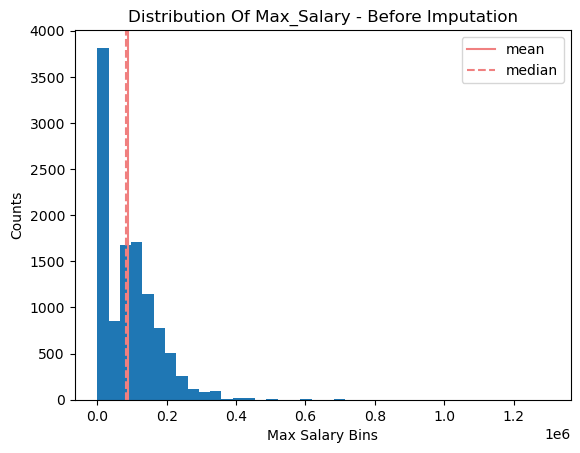

In [42]:
plt.figure()

plt.hist(df['max_salary'], bins=40)
plt.axvline(df['max_salary'].mean(), color="lightcoral", label="mean")
plt.axvline(df['max_salary'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of max_salary - before imputation".title())
plt.xlabel("Max Salary Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

The histogram show that the `max_salary` data is right skewed, which signals that there are some outliers skewing the data. The presence of outliers distorts the mean value, thus we will use median value to fill the missing values.

In [43]:
df['max_salary'] = df['max_salary'].fillna(df['max_salary'].median())
df['max_salary'].isna().sum()

0

#### Min Salary

In [44]:
df['min_salary'].describe()

count     11111.000000
mean      62650.128421
std       58732.644143
min           7.250000
25%          40.945000
50%       62128.000000
75%      100000.000000
max      800000.000000
Name: min_salary, dtype: float64

In [45]:
df['min_salary'].isna().sum()/df.shape[0]*100

66.57943812789509

Let's create a visualization to observe the distribution of `min_salary` column.

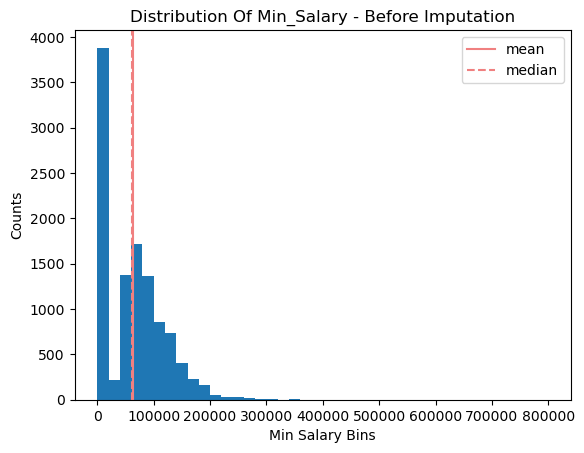

In [46]:
plt.figure()

plt.hist(df['min_salary'], bins=40)
plt.axvline(df['min_salary'].mean(), color="lightcoral", label="mean")
plt.axvline(df['min_salary'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of min_salary - before imputation".title())
plt.xlabel("Min Salary Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

The histogram show that the `min_salary` data is right skewed, which signals that there are some outliers skewing the data. The presence of outliers distorts the mean value, thus we will use median value to fill the missing values.

In [47]:
df['min_salary'] = df['min_salary'].fillna(df['min_salary'].median())
df['min_salary'].isna().sum()

0

#### Median Salary

In [48]:
df['med_salary'].isna().sum()/df.shape[0]*100

93.25933946940985

In [49]:
df['med_salary'].describe()

count      2241.000000
mean      32426.170598
std       76860.422528
min           0.000000
25%          18.780000
50%          29.000000
75%       42746.000000
max      998426.000000
Name: med_salary, dtype: float64

Unlike `min_salary` and `max_salary`, `med_salary` is missing 93 percent of the dataset, thus it is harder to impute the null values. Here we will focus on whether the company has provided the median salary information in the job posting or not by creating a binary column. The entries of '0' indicates that companies have not disclosed the median salary information and the entries of '1' suggests that the companies have included the median salary information within the dataset. Then, we will drop the `med_salary` column.

In [50]:
df['med_salary_present'] = df['med_salary'].notnull().astype(int)

In [51]:
df.drop(columns=['med_salary'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  object 
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   max_salary                  33246 non-null  float64
 5   min_salary                  33246 non-null  float64
 6   pay_period                  33246 non-null  object 
 7   formatted_work_type         33246 non-null  object 
 8   location                    33246 non-null  object 
 9   applies                     16238 non-null  float64
 10  original_listed_time        33246 non-null  float64
 11  remote_allowed              4802 non-null   float64
 12  views                       25886 non-null  float64
 13  application_type            332

#### Applies

In [52]:
df['applies'].isna().sum()

17008

In [53]:
df['applies'].isna().sum()/df.shape[0]

0.5115803404920892

In [54]:
df['applies'].describe()

count    16238.000000
mean        18.895246
std         49.059029
min          1.000000
25%          2.000000
50%          5.000000
75%         16.000000
max       1615.000000
Name: applies, dtype: float64

Let's create a visualization to observe the distribution of `applies` column.

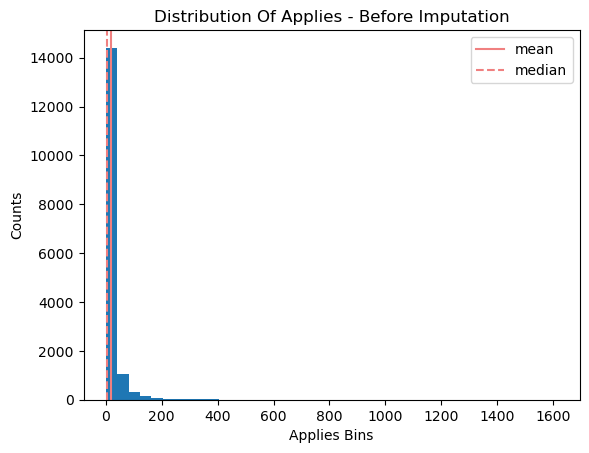

In [55]:
plt.figure()

plt.hist(df['applies'], bins=40)
plt.axvline(df['applies'].mean(), color="lightcoral", label="mean")
plt.axvline(df['applies'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of applies - before imputation".title())
plt.xlabel("Applies Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

The histogram show that the `applies` data is heavily right skewed, which signals that there are some outliers skewing the data. The presence of outliers distorts the mean value, thus we will use median value to fill the missing values.

In [56]:
df['applies'] = df['applies'].fillna(df['applies'].median())

In [57]:
df['applies'].isna().sum()

0

#### Views

In [58]:
df['views'].isna().sum()

7360

In [59]:
df['views'].isna().sum()/df.shape[0]*100

22.138001564097937

In [60]:
df['views'].describe()

count    25886.000000
mean        58.339875
std        141.253774
min          1.000000
25%          4.000000
50%         16.000000
75%         54.000000
max       5656.000000
Name: views, dtype: float64

Let's create a visualization to observe the distribution of `views` column.

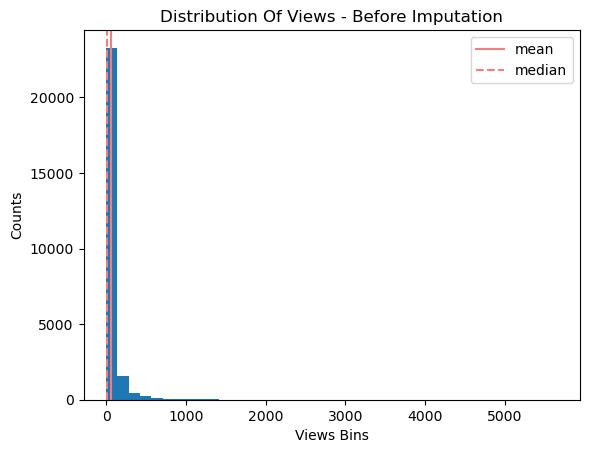

In [61]:
plt.figure()

plt.hist(df['views'], bins=40)
plt.axvline(df['views'].mean(), color="lightcoral", label="mean")
plt.axvline(df['views'].median(), color="lightcoral", linestyle="--", label="median")

plt.title("Distribution of views - before imputation".title())
plt.xlabel("Views Bins")
plt.ylabel("Counts")


plt.legend()
plt.show()

The histogram show that the `views` data is heavily right skewed, which signals that there are some outliers skewing the data. The presence of outliers distorts the mean value, thus we will use median value to fill the missing values.

In [62]:
df['views'] = df['views'].fillna(df['views'].median())

In [63]:
df['views'].isna().sum()

0

#### Remote Allowed

In [64]:
df['remote_allowed'].describe()

count    4802.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: remote_allowed, dtype: float64

In [65]:
df['remote_allowed'].value_counts()

remote_allowed
1.0    4802
Name: count, dtype: int64

The dataset only contains the response of '1'. This could be due to the method of data collection. For instance, if the survey only had one tick-off box to check off whether the remote-working is allowed or not, then it would make sense why the data only contains '1' as its only response. 

In [66]:
df['remote_allowed'].isna().sum()/df.shape[0]*100

85.55615713168501

To fill in the null values, we will convert this variable into a binary column (0 and 1). Here, we are making an assumption that '0' will represent the missing values (remote-working not allowed), and '1' will be remote working allowed responses. We can simply fill the missing values in with 0s to achieve this.

In [67]:
df['remote_allowed'] = df['remote_allowed'].fillna(0)
df['remote_allowed'].isna().sum()

0

#### Closed Time

In [68]:
df['closed_time'].describe()

count    1.172000e+03
mean     1.692082e+12
std      4.061876e+09
min      1.690000e+12
25%      1.690000e+12
50%      1.690000e+12
75%      1.690000e+12
max      1.700000e+12
Name: closed_time, dtype: float64

In [69]:
df['closed_time'].isna().sum()/df.shape[0]*100

96.47476388136919

Since it's missing majority of the values (96.5%), we will focus on whether the companies have included the closed time information or not in their job postings and observe if the presence of `closed_time` variable is relevant in terms of number of views. To achieve this, we will create a binary column with '0' and '1' where '0' represents no closed time information and '1' represents the indication of closed time information within the dataset.

In [70]:
df['closed_time_present'] = df['closed_time'].notnull().astype(int)

In [71]:
df.drop(columns=['closed_time'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  object 
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   max_salary                  33246 non-null  float64
 5   min_salary                  33246 non-null  float64
 6   pay_period                  33246 non-null  object 
 7   formatted_work_type         33246 non-null  object 
 8   location                    33246 non-null  object 
 9   applies                     33246 non-null  float64
 10  original_listed_time        33246 non-null  float64
 11  remote_allowed              33246 non-null  float64
 12  views                       33246 non-null  float64
 13  application_type            332

In [72]:
df.isna().sum()

job_id                        0
company_id                    0
title                         0
description                   0
max_salary                    0
min_salary                    0
pay_period                    0
formatted_work_type           0
location                      0
applies                       0
original_listed_time          0
remote_allowed                0
views                         0
application_type              0
expiry                        0
formatted_experience_level    0
listed_time                   0
sponsored                     0
skills_present                0
application_method            0
med_salary_present            0
closed_time_present           0
dtype: int64

We have completed all the data cleaning processes by filling in the null values. Now we will conduct some basic EDA to address our original question: "Is there any relationships between the `views` column with other variables within the `job_postings` dataset?"

## EDA

We will begin by creating some visualizations to depict any potential relationships between the `views` column and other variables. Our goal is to see if there are any patterns within the visualizations to analyze the job trends regarding the `views`.

### Work Type

Let's take a look at the distribution of the `formatted_work_type` column.

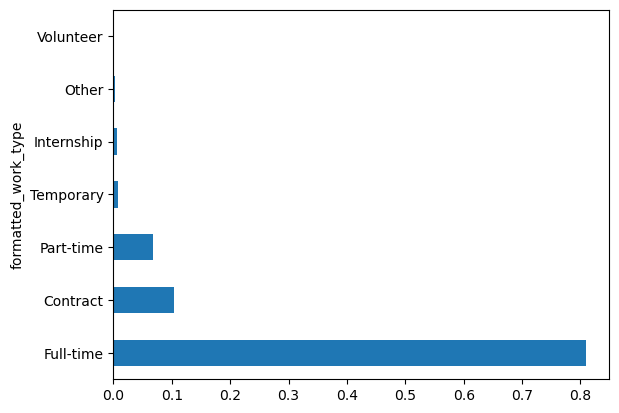

In [73]:
df['formatted_work_type'].value_counts(normalize=True).plot(kind="barh")
plt.show()

The "Full-time" work type was the most common, followed by "Contract" and "Part-time". Hence, within the LinkedIn space, most companies are looking to hire full-time positions rather than part-time or contract. Will the preference of full-time positions by recruiters have affects on the number of job posting views?

### Experience Level

Let's create a bar chart to check the distribution of `formatted_experience_level` variable.

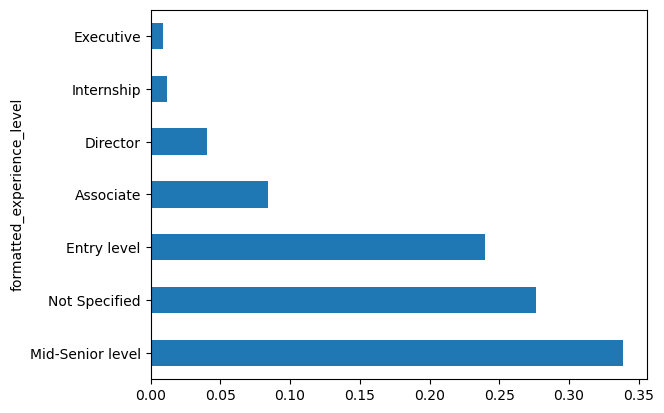

In [74]:
df['formatted_experience_level'].value_counts(normalize=True).plot(kind="barh")
plt.show()

The "Mid-Senior level" was the most common experience level that the companies were looking for, followed by "Not Specified", "Entry level", "Associate", "Director", "Internship" and "Executive". Through modeling, we will see if the experience level has any relationship with the number of views, which can help us to identify the preference of applicants.

### Sponsored

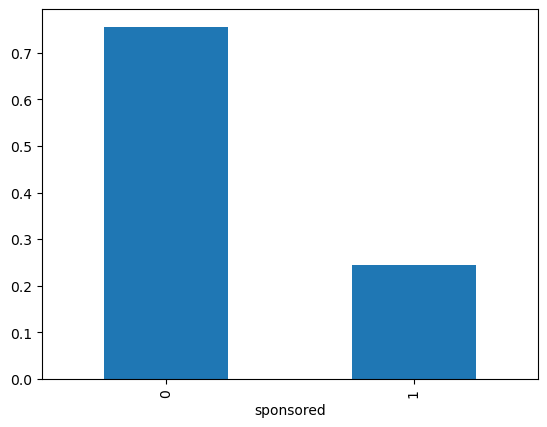

In [75]:
df['sponsored'].value_counts(normalize=True).plot(kind="bar")
plt.show()

According to the visualization above, there were a lot more job postings that weren't sponsored or promoted than ones that were sponsored or promoted. In the later analysis, we will look for a potential relationship between sponsorship and number of views to test whether the `sponsor` column has an influence on the number of views.

### Skills Description

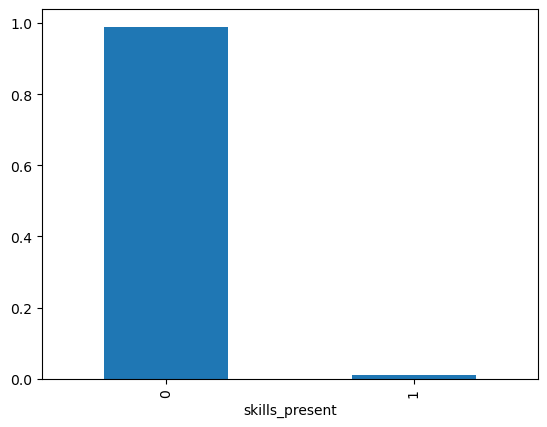

In [76]:
df['skills_present'].value_counts(normalize=True).plot(kind="bar")
plt.show()

Majority of the job postings were missing skills description. Hence, we will look for a potential relationship between the number of views and the presence of skills description within the job posting.

### Median Salary

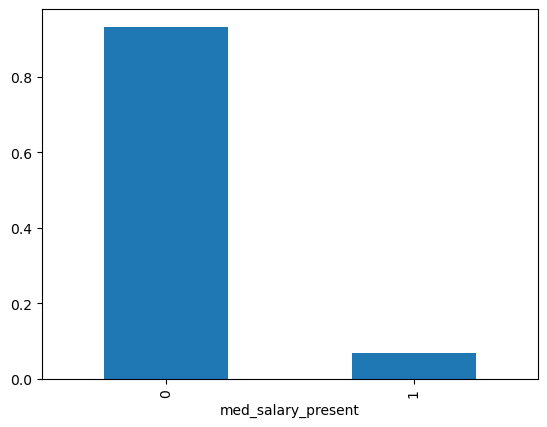

In [77]:
df['med_salary_present'].value_counts(normalize=True).plot(kind="bar")
plt.show()

Majority of the companies did not disclose the median salary information. This is normal, and we will look into the potential relationship between number of views and the presence of median salary data within the job posting.

### Views and Applies

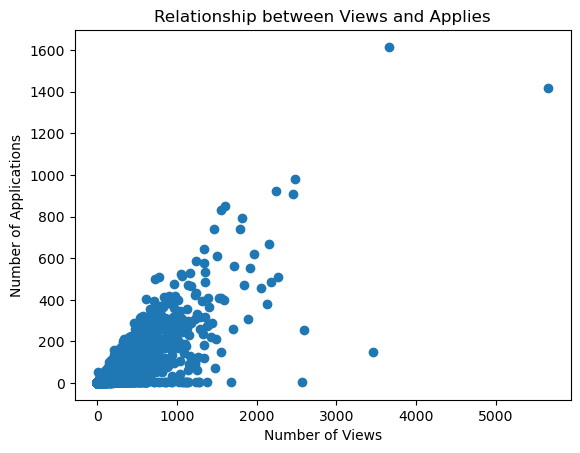

In [78]:
x = df['views']
y = df['applies']

plt.scatter(x, y)
plt.xlabel("Number of Views") 
plt.ylabel("Number of Applications") 
plt.title("Relationship between Views and Applies") 
plt.show()

The scatter plot between `views` and `applies` depicts a positive correlation between the two variables. In other words, as the number of views increase, the number of applications submitted also rises. The more views the job posting get, the more likely to receive applications.

## Summary

In this notebook, we performed an analysis of a job posting dataset from LinkedIn, focusing on the `views` variable. The preliminary analysis included data loading, data cleaning, and basic EDA with visualization. Through experimentation, we were able to see the impacts of various job posting features, such as the experience level, number of applications submitted, median salary and more. The basic EDA analysis culminated in visualizations and insights aimed at understanding the job market trends, with an emphasis on number of views.